In [204]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import random
# from d2l import torch as d2l

In [205]:
dataset_name = 'subjective_belief_observers_features_labels.csv'
data = pd.read_csv(dataset_name)

In [206]:
# check data integrity
observers_predict_label = np.array([0 for _ in range(data.shape[0])])
observers_predict_label.reshape(-1, 1)
true_labels = data.iloc[:, -1]
for i in range(data.shape[0]):
    if data.iloc[i][0][-1] == 'n':
        observers_predict_label[i] = 1
observers_predict_label = pd.DataFrame(observers_predict_label)
correct_trust, correct_doubt, total_trust, total_doubt = 0, 0, 0, 0
for i in range(data.shape[0]):
    if true_labels[i] == 1:
        total_trust += 1
        if observers_predict_label.iloc[i][0] == 1:
            correct_trust += 1
    else:
        total_doubt += 1
        if observers_predict_label.iloc[i][0] == 0:
            correct_doubt += 1

In [207]:
# drop first column of participant id
data.drop(data.columns[0], axis=1, inplace=True)
data = pd.concat([data.iloc[:, -40:-1], observers_predict_label], axis=1)
# normalise input data
for column in data.columns[:-1]:
    # the last column is target
    data[column] = data.loc[:, [column]].apply(lambda x: (x - x.mean()) / x.std())
# according to original dataset 23 participants are involved
num_participants = 23
# 
print(data.shape)

(368, 40)


In [208]:
num_feats = data.shape[1] - 1
num_inputs = num_feats
num_classes = 2

In [209]:
# mini batch iteration
def data_iter(batch_size, features, labels):
    num_examples = len(labels)
    indices = list(range(num_examples))
    # randomly selecting 
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [210]:
# hyperparams
num_hidden_neurons = 100
epochs = 200
learning_rate = .01

In [211]:
class Reshape(nn.Module):
    def forward(self, x):
        return x.view(-1, 1, 6, 6)

Epoch: 0/200; Loss: 0.7814; Accuracy: 47.90 %
Epoch: 50/200; Loss: 0.4534; Accuracy: 77.03 %
Epoch: 100/200; Loss: 0.0881; Accuracy: 97.76 %
Epoch: 150/200; Loss: 0.0110; Accuracy: 100.00 %


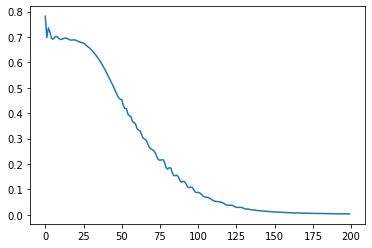

tensor(1.8038, grad_fn=<NllLossBackward>)
Test accuracy total: 63.64 %; correct: 7; wrong: 4;
Test accuracy doubt: 100.00 %; correct: 4; wrong: 0;
Test accuracy no-doubt: 42.86 %; correct: 3; wrong: 4;

Epoch: 0/200; Loss: 0.7694; Accuracy: 52.87 %
Epoch: 50/200; Loss: 0.4376; Accuracy: 79.89 %
Epoch: 100/200; Loss: 0.1490; Accuracy: 96.55 %
Epoch: 150/200; Loss: 0.0170; Accuracy: 100.00 %


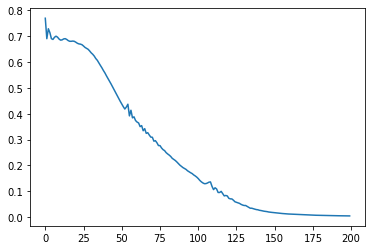

tensor(3.6283, grad_fn=<NllLossBackward>)
Test accuracy total: 55.00 %; correct: 11; wrong: 9;
Test accuracy doubt: 45.45 %; correct: 5; wrong: 6;
Test accuracy no-doubt: 66.67 %; correct: 6; wrong: 3;

Epoch: 0/200; Loss: 1.2080; Accuracy: 51.45 %
Epoch: 50/200; Loss: 0.5513; Accuracy: 76.01 %
Epoch: 100/200; Loss: 0.2504; Accuracy: 90.75 %
Epoch: 150/200; Loss: 0.0829; Accuracy: 97.40 %


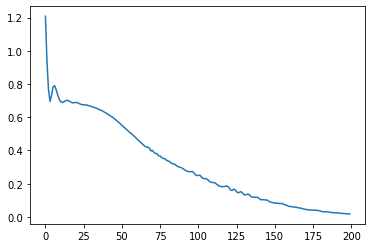

tensor(3.9738, grad_fn=<NllLossBackward>)
Test accuracy total: 54.55 %; correct: 12; wrong: 10;
Test accuracy doubt: 57.14 %; correct: 4; wrong: 3;
Test accuracy no-doubt: 53.33 %; correct: 8; wrong: 7;

Epoch: 0/200; Loss: 0.7010; Accuracy: 47.43 %
Epoch: 50/200; Loss: 0.3584; Accuracy: 85.71 %
Epoch: 100/200; Loss: 0.1331; Accuracy: 95.43 %
Epoch: 150/200; Loss: 0.0351; Accuracy: 99.71 %


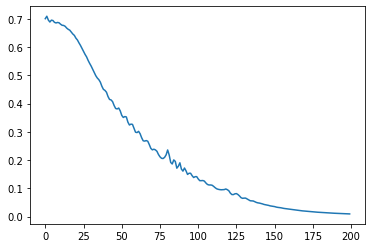

tensor(1.9306, grad_fn=<NllLossBackward>)
Test accuracy total: 66.67 %; correct: 12; wrong: 6;
Test accuracy doubt: 77.78 %; correct: 7; wrong: 2;
Test accuracy no-doubt: 55.56 %; correct: 5; wrong: 4;

Epoch: 0/200; Loss: 0.6910; Accuracy: 53.11 %
Epoch: 50/200; Loss: 0.3664; Accuracy: 84.18 %
Epoch: 100/200; Loss: 0.1107; Accuracy: 97.18 %
Epoch: 150/200; Loss: 0.0152; Accuracy: 100.00 %


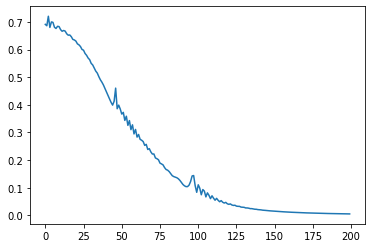

tensor(3.8439, grad_fn=<NllLossBackward>)
Test accuracy total: 57.14 %; correct: 8; wrong: 6;
Test accuracy doubt: 55.56 %; correct: 5; wrong: 4;
Test accuracy no-doubt: 60.00 %; correct: 3; wrong: 2;

Epoch: 0/200; Loss: 0.6930; Accuracy: 47.98 %
Epoch: 50/200; Loss: 0.3005; Accuracy: 87.28 %
Epoch: 100/200; Loss: 0.0383; Accuracy: 99.42 %
Epoch: 150/200; Loss: 0.0064; Accuracy: 100.00 %


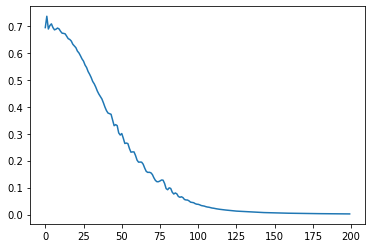

tensor(5.4979, grad_fn=<NllLossBackward>)
Test accuracy total: 40.91 %; correct: 9; wrong: 13;
Test accuracy doubt: 55.56 %; correct: 5; wrong: 4;
Test accuracy no-doubt: 30.77 %; correct: 4; wrong: 9;

Epoch: 0/200; Loss: 0.8735; Accuracy: 52.99 %
Epoch: 50/200; Loss: 0.5258; Accuracy: 76.07 %
Epoch: 100/200; Loss: 0.1907; Accuracy: 94.02 %
Epoch: 150/200; Loss: 0.0635; Accuracy: 99.15 %


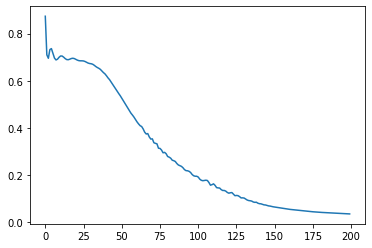

tensor(3.0825, grad_fn=<NllLossBackward>)
Test accuracy total: 47.06 %; correct: 8; wrong: 9;
Test accuracy doubt: 60.00 %; correct: 6; wrong: 4;
Test accuracy no-doubt: 28.57 %; correct: 2; wrong: 5;

Epoch: 0/200; Loss: 0.8563; Accuracy: 52.41 %
Epoch: 50/200; Loss: 0.5849; Accuracy: 69.12 %
Epoch: 100/200; Loss: 0.2350; Accuracy: 91.78 %
Epoch: 150/200; Loss: 0.0900; Accuracy: 97.45 %


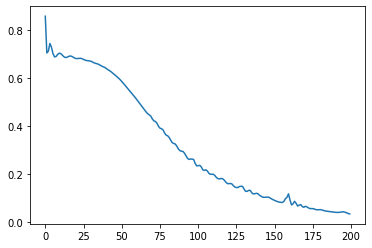

tensor(3.7163, grad_fn=<NllLossBackward>)
Test accuracy total: 40.00 %; correct: 6; wrong: 9;
Test accuracy doubt: 42.86 %; correct: 3; wrong: 4;
Test accuracy no-doubt: 37.50 %; correct: 3; wrong: 5;

Epoch: 0/200; Loss: 0.7397; Accuracy: 51.59 %
Epoch: 50/200; Loss: 0.3926; Accuracy: 82.03 %
Epoch: 100/200; Loss: 0.0849; Accuracy: 97.97 %
Epoch: 150/200; Loss: 0.0133; Accuracy: 100.00 %


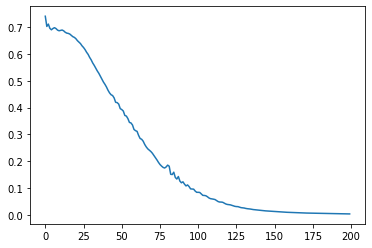

tensor(2.8438, grad_fn=<NllLossBackward>)
Test accuracy total: 52.17 %; correct: 12; wrong: 11;
Test accuracy doubt: 50.00 %; correct: 4; wrong: 4;
Test accuracy no-doubt: 53.33 %; correct: 8; wrong: 7;

Epoch: 0/200; Loss: 1.2191; Accuracy: 47.14 %
Epoch: 50/200; Loss: 0.6826; Accuracy: 61.43 %
Epoch: 100/200; Loss: 0.3916; Accuracy: 83.43 %
Epoch: 150/200; Loss: 0.1569; Accuracy: 94.86 %


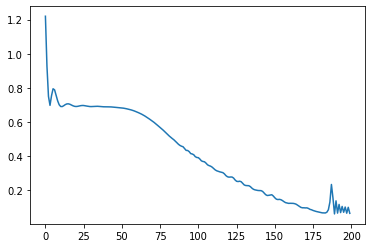

tensor(2.7631, grad_fn=<NllLossBackward>)
Test accuracy total: 61.11 %; correct: 11; wrong: 7;
Test accuracy doubt: 40.00 %; correct: 4; wrong: 6;
Test accuracy no-doubt: 87.50 %; correct: 7; wrong: 1;

Epoch: 0/200; Loss: 0.7425; Accuracy: 52.68 %
Epoch: 50/200; Loss: 0.4404; Accuracy: 81.69 %
Epoch: 100/200; Loss: 0.1311; Accuracy: 96.34 %
Epoch: 150/200; Loss: 0.0185; Accuracy: 100.00 %


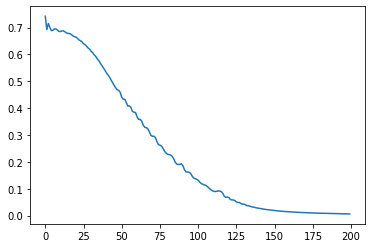

tensor(1.7734, grad_fn=<NllLossBackward>)
Test accuracy total: 69.23 %; correct: 9; wrong: 4;
Test accuracy doubt: 42.86 %; correct: 3; wrong: 4;
Test accuracy no-doubt: 100.00 %; correct: 6; wrong: 0;

Epoch: 0/200; Loss: 0.6931; Accuracy: 52.44 %
Epoch: 50/200; Loss: 0.3520; Accuracy: 85.96 %
Epoch: 100/200; Loss: 0.0452; Accuracy: 99.71 %
Epoch: 150/200; Loss: 0.0072; Accuracy: 100.00 %


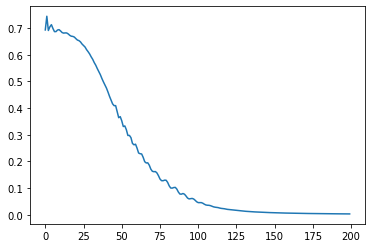

tensor(3.4383, grad_fn=<NllLossBackward>)
Test accuracy total: 52.63 %; correct: 10; wrong: 9;
Test accuracy doubt: 77.78 %; correct: 7; wrong: 2;
Test accuracy no-doubt: 30.00 %; correct: 3; wrong: 7;

Epoch: 0/200; Loss: 0.8806; Accuracy: 48.30 %
Epoch: 50/200; Loss: 0.6011; Accuracy: 68.75 %
Epoch: 100/200; Loss: 0.1735; Accuracy: 94.03 %
Epoch: 150/200; Loss: 0.0211; Accuracy: 100.00 %


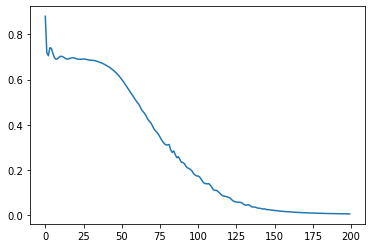

tensor(2.7549, grad_fn=<NllLossBackward>)
Test accuracy total: 31.25 %; correct: 5; wrong: 11;
Test accuracy doubt: 40.00 %; correct: 2; wrong: 3;
Test accuracy no-doubt: 27.27 %; correct: 3; wrong: 8;

Epoch: 0/200; Loss: 0.7162; Accuracy: 47.41 %
Epoch: 50/200; Loss: 0.3789; Accuracy: 83.62 %
Epoch: 100/200; Loss: 0.0839; Accuracy: 98.85 %
Epoch: 150/200; Loss: 0.0160; Accuracy: 100.00 %


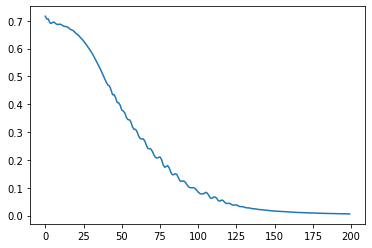

tensor(2.4491, grad_fn=<NllLossBackward>)
Test accuracy total: 55.00 %; correct: 11; wrong: 9;
Test accuracy doubt: 50.00 %; correct: 5; wrong: 5;
Test accuracy no-doubt: 60.00 %; correct: 6; wrong: 4;

Epoch: 0/200; Loss: 0.7407; Accuracy: 52.27 %
Epoch: 50/200; Loss: 0.4054; Accuracy: 82.39 %
Epoch: 100/200; Loss: 0.0848; Accuracy: 98.30 %
Epoch: 150/200; Loss: 0.0119; Accuracy: 100.00 %


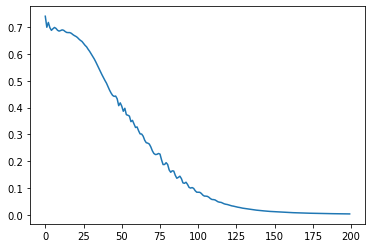

tensor(4.5607, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 71.43 %; correct: 5; wrong: 2;
Test accuracy no-doubt: 44.44 %; correct: 4; wrong: 5;

Epoch: 0/200; Loss: 0.7659; Accuracy: 52.31 %
Epoch: 50/200; Loss: 0.5277; Accuracy: 74.57 %
Epoch: 100/200; Loss: 0.1966; Accuracy: 92.49 %
Epoch: 150/200; Loss: 0.0825; Accuracy: 97.69 %


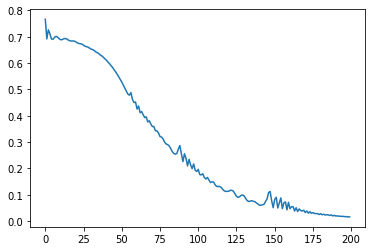

tensor(2.5092, grad_fn=<NllLossBackward>)
Test accuracy total: 59.09 %; correct: 13; wrong: 9;
Test accuracy doubt: 50.00 %; correct: 5; wrong: 5;
Test accuracy no-doubt: 66.67 %; correct: 8; wrong: 4;

Epoch: 0/200; Loss: 0.6951; Accuracy: 47.89 %
Epoch: 50/200; Loss: 0.3118; Accuracy: 87.61 %
Epoch: 100/200; Loss: 0.0659; Accuracy: 98.59 %
Epoch: 150/200; Loss: 0.0079; Accuracy: 100.00 %


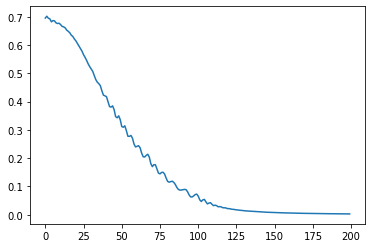

tensor(5.6046, grad_fn=<NllLossBackward>)
Test accuracy total: 46.15 %; correct: 6; wrong: 7;
Test accuracy doubt: 50.00 %; correct: 3; wrong: 3;
Test accuracy no-doubt: 42.86 %; correct: 3; wrong: 4;

Epoch: 0/200; Loss: 0.7160; Accuracy: 52.27 %
Epoch: 50/200; Loss: 0.3783; Accuracy: 82.39 %
Epoch: 100/200; Loss: 0.0795; Accuracy: 98.30 %
Epoch: 150/200; Loss: 0.0478; Accuracy: 98.86 %


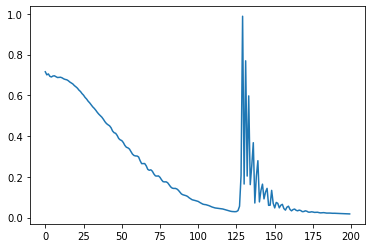

tensor(4.0497, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 57.14 %; correct: 4; wrong: 3;
Test accuracy no-doubt: 55.56 %; correct: 5; wrong: 4;

Epoch: 0/200; Loss: 0.8641; Accuracy: 47.40 %
Epoch: 50/200; Loss: 0.5887; Accuracy: 65.90 %
Epoch: 100/200; Loss: 0.2365; Accuracy: 91.33 %
Epoch: 150/200; Loss: 0.0617; Accuracy: 99.13 %


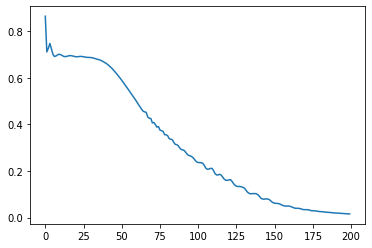

tensor(1.7401, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 11; wrong: 11;
Test accuracy doubt: 54.55 %; correct: 6; wrong: 5;
Test accuracy no-doubt: 45.45 %; correct: 5; wrong: 6;

Epoch: 0/200; Loss: 0.7680; Accuracy: 47.69 %
Epoch: 50/200; Loss: 0.4721; Accuracy: 76.88 %
Epoch: 100/200; Loss: 0.1423; Accuracy: 95.95 %
Epoch: 150/200; Loss: 0.0196; Accuracy: 99.71 %


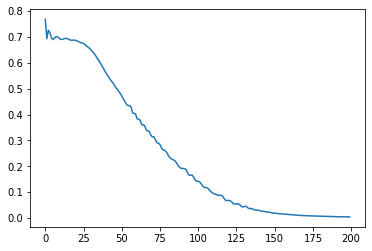

tensor(2.8884, grad_fn=<NllLossBackward>)
Test accuracy total: 45.45 %; correct: 10; wrong: 12;
Test accuracy doubt: 60.00 %; correct: 6; wrong: 4;
Test accuracy no-doubt: 33.33 %; correct: 4; wrong: 8;

Epoch: 0/200; Loss: 0.8567; Accuracy: 51.59 %
Epoch: 50/200; Loss: 0.5527; Accuracy: 72.17 %
Epoch: 100/200; Loss: 0.2117; Accuracy: 93.33 %
Epoch: 150/200; Loss: 0.0862; Accuracy: 98.55 %


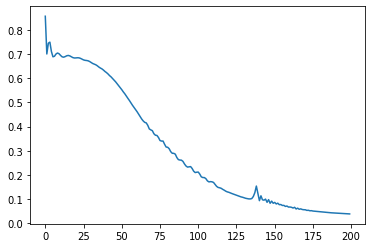

tensor(1.8240, grad_fn=<NllLossBackward>)
Test accuracy total: 52.17 %; correct: 12; wrong: 11;
Test accuracy doubt: 75.00 %; correct: 6; wrong: 2;
Test accuracy no-doubt: 40.00 %; correct: 6; wrong: 9;

Epoch: 0/200; Loss: 0.6999; Accuracy: 47.11 %
Epoch: 50/200; Loss: 0.3484; Accuracy: 85.84 %
Epoch: 100/200; Loss: 0.0833; Accuracy: 97.98 %
Epoch: 150/200; Loss: 0.0171; Accuracy: 100.00 %


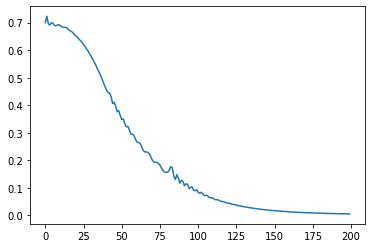

tensor(2.9749, grad_fn=<NllLossBackward>)
Test accuracy total: 72.73 %; correct: 16; wrong: 6;
Test accuracy doubt: 66.67 %; correct: 8; wrong: 4;
Test accuracy no-doubt: 80.00 %; correct: 8; wrong: 2;

Epoch: 0/200; Loss: 0.6937; Accuracy: 51.96 %
Epoch: 50/200; Loss: 0.2939; Accuracy: 88.83 %
Epoch: 100/200; Loss: 0.0439; Accuracy: 99.44 %
Epoch: 150/200; Loss: 0.0068; Accuracy: 100.00 %


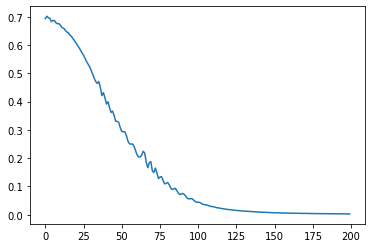

tensor(2.0878, grad_fn=<NllLossBackward>)
Test accuracy total: 60.00 %; correct: 6; wrong: 4;
Test accuracy doubt: 25.00 %; correct: 1; wrong: 3;
Test accuracy no-doubt: 83.33 %; correct: 5; wrong: 1;



In [212]:
all_losses = [[] for _ in range(num_participants)]
test_accuracies = []
test_accuracies_doubt = []
test_accuracies_nodoubt = []
for par in range(num_participants-1, -1, -1):

    features = data.iloc[:, :39]
    least_signifant_features = [11, 24, 35]
    features.drop(features.columns[least_signifant_features], axis=1, inplace=True)
    labels = data.iloc[:, 39:]

    msk = np.random.rand(len(data)) < 0.95
    features_train_df = features[msk]
    labels_train_df = labels[msk]
    features_test_df = features[~msk]
    labels_test_df = labels[~msk]

    X_train = torch.tensor(np.reshape(features_train_df.to_numpy(), (features_train_df.shape[0], 6, 6)), dtype=torch.double).float()
    Y_train = torch.tensor(labels_train_df.to_numpy(), dtype=torch.double)
    Y_train = Y_train.reshape((Y_train.shape[0],))

    X_test = torch.tensor(np.reshape(features_test_df.to_numpy(), (features_test_df.shape[0], 6, 6)), dtype=torch.double).float()
    Y_test = torch.tensor(labels_test_df.to_numpy(), dtype=torch.double)
    Y_test = Y_test.reshape((Y_test.shape[0]))

    net = nn.Sequential(Reshape(),
                    nn.Conv2d(1, 6, kernel_size=5, padding=2),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(6, 16, kernel_size=5, padding=2),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Flatten(),
                    nn.Linear(16*1*1, 50),
                    nn.Sigmoid(),
                    nn.Linear(50, 2),
                    )
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    # use crossentropy loss and adam for optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    # optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        Y_train_pred = net(X_train)
        Y_train_pred = Y_train_pred.float()
        loss = loss_func(Y_train_pred, Y_train.long())
        all_losses[par].append(loss.item())
        if epoch % 50 == 0:
            _, predicted = torch.max(Y_train_pred, 1)
            total = Y_train.data.size(0)
            correct = sum(predicted.data.numpy() == Y_train.data.numpy())
            print('Epoch: %d/%d; Loss: %.4f; Accuracy: %.2f %%' %(epoch, epochs, loss, 100*correct/total))
        net.zero_grad()
        loss.backward()
        optimizer.step()
    
    # extra visulization for training outcomes
    plt.figure()
    plt.plot(all_losses[par])
    plt.show()

    # test our network
    # X_test = torch.tensor(test_inputs.values, dtype=torch.float)
    # Y_test = torch.tensor(test_labels.values, dtype=torch.long)
    Y_test_pred = net(X_test)
    Y_test_pred = Y_test_pred.float()
    loss = loss_func(Y_test_pred, Y_test.long())
    print(loss)
    _, predicted = torch.max(Y_test_pred, 1)
    total_test = Y_test.shape[0]
    correct_test = sum(predicted.data.numpy() == Y_test.data.numpy())
    # calculate doubt and trust separately
    correct_doubt, correct_nodoubt, total_doubt, total_nodoubt = 0, 0, 0, 0
    for i in range(total_test):
        if Y_test.data.numpy()[i] == 1:
            total_nodoubt += 1
            if predicted.data.numpy()[i] == 1:
                correct_nodoubt += 1
        else:
            total_doubt += 1
            if predicted.data.numpy()[i] == 0:
                correct_doubt += 1
    test_accuracies.append(correct_test/total_test)
    if total_doubt != 0:
        test_accuracies_doubt.append(correct_doubt/total_doubt)
    if total_nodoubt != 0:
        test_accuracies_nodoubt.append(correct_nodoubt/total_nodoubt)
    print('Test accuracy total: %.2f %%; correct: %d; wrong: %d;' %(100*test_accuracies[-1], correct_test, total_test-correct_test))
    print('Test accuracy doubt: %.2f %%; correct: %d; wrong: %d;' %(100*test_accuracies_doubt[-1], correct_doubt, total_doubt-correct_doubt))
    print('Test accuracy no-doubt: %.2f %%; correct: %d; wrong: %d;\n' %(100*test_accuracies_nodoubt[-1], correct_nodoubt, total_nodoubt-correct_nodoubt))

In [213]:
X = torch.rand(size=(1, 1, 6, 6), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Reshape output shape: 	 torch.Size([1, 1, 6, 6])
Conv2d output shape: 	 torch.Size([1, 6, 6, 6])
ReLU output shape: 	 torch.Size([1, 6, 6, 6])
MaxPool2d output shape: 	 torch.Size([1, 6, 3, 3])
Conv2d output shape: 	 torch.Size([1, 16, 3, 3])
ReLU output shape: 	 torch.Size([1, 16, 3, 3])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 1])
Flatten output shape: 	 torch.Size([1, 16])
Linear output shape: 	 torch.Size([1, 50])
Sigmoid output shape: 	 torch.Size([1, 50])
Linear output shape: 	 torch.Size([1, 2])


In [214]:
print(*[(name, param.shape) for name, param in net.named_parameters()])
# weight_input2hidden = np.absolute(net.state_dict()['1.weight'].data.numpy())
# weight_hidden2output = np.absolute(net.state_dict()['3.weight'].data.numpy())
# weight_input2hidden /= weight_input2hidden.sum(axis=1, keepdims=True)
# weight_hidden2output /= weight_hidden2output.sum(axis=1, keepdims=True)
# # calculate the Q weight matrix
# Q = np.dot(weight_hidden2output, weight_input2hidden).sum(axis=0)
# np.argsort(Q)

('1.weight', torch.Size([6, 1, 5, 5])) ('1.bias', torch.Size([6])) ('4.weight', torch.Size([16, 6, 5, 5])) ('4.bias', torch.Size([16])) ('8.weight', torch.Size([50, 16])) ('8.bias', torch.Size([50])) ('10.weight', torch.Size([2, 50])) ('10.bias', torch.Size([2]))


In [215]:
# show accuracies
print('Total accuracy: %.3f' %(sum(test_accuracies)/len(test_accuracies)))
print('Doubt accuracy: %.3f' %(sum(test_accuracies_doubt)/len(test_accuracies_doubt)))
print('Trust accuracy: %.3f' %(sum(test_accuracies_nodoubt)/len(test_accuracies_nodoubt)))

Total accuracy: 0.541
Doubt accuracy: 0.567
Trust accuracy: 0.533
